## Information about this Notebook ##
## Based on Course - https://www.youtube.com/watch?v=jztwpsIzEGc ## 
### Get the Code ### 
#### https://github.com/nicknochnack/ImageClassification ####

So...you wanna build your own image classifier eh? Well in this tutorial you're going to learn how to do exactly that...FROM SCRATCH using Python, Tensorflow and Keras. But best yet, you can do it on virtually any dataset. Go on, give it a go!

### Links ###
Sigmoid Activation: https://en.wikipedia.org/wiki/Sigmoid...
Relu Activation: https://en.wikipedia.org/wiki/Rectifi...)
Image Downloader Extension: https://chrome.google.com/webstore/de...
Conv2D Layer: https://www.tensorflow.org/api_docs/p...
MaxPooling Layer: https://keras.io/api/layers/pooling_l...

In [1]:
# pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
tf.test.is_built_with_cuda(), tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


(True, False)

In [4]:
# listdir will list all the files in given path
os.listdir('datasets')

['archive (1)',
 'archive (2)',
 'archive (3)',
 'archive (4)',
 'archive (7)',
 'framingham.csv']

In [5]:
# Configure GPU to avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.list_physical_devices('GPU')

In [6]:
len(gpus)

0

In [7]:
cpus = tf.config.list_physical_devices('CPU')

In [8]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
print(tf.__version__)

2.10.0


In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16717246467033786739
xla_global_id: -1
]


## 1.2 Remove dodgy images

In [175]:
# import cv2
import imghdr

In [176]:
data_dir = 'datasets/archive (7)/files'

In [177]:
os.listdir(data_dir)

['aneurysm', 'cancer', 'tumor']

In [178]:
os.listdir(os.path.join(data_dir, 'cancer'))

['0.dcm',
 '0.jpg',
 '1.dcm',
 '1.jpg',
 '10.dcm',
 '10.jpg',
 '11.dcm',
 '11.jpg',
 '12.dcm',
 '12.jpg',
 '13.dcm',
 '13.jpg',
 '14.dcm',
 '14.jpg',
 '15.dcm',
 '15.jpg',
 '16.dcm',
 '16.jpg',
 '17.dcm',
 '17.jpg',
 '18.dcm',
 '18.jpg',
 '19.dcm',
 '19.jpg',
 '2.dcm',
 '2.jpg',
 '20.dcm',
 '20.jpg',
 '21.dcm',
 '21.jpg',
 '22.dcm',
 '22.jpg',
 '23.dcm',
 '23.jpg',
 '24.dcm',
 '24.jpg',
 '25.dcm',
 '25.jpg',
 '26.dcm',
 '26.jpg',
 '27.dcm',
 '27.jpg',
 '28.dcm',
 '28.jpg',
 '29.dcm',
 '29.jpg',
 '3.dcm',
 '3.jpg',
 '30.dcm',
 '30.jpg',
 '31.dcm',
 '31.jpg',
 '32.dcm',
 '32.jpg',
 '33.dcm',
 '33.jpg',
 '34.dcm',
 '34.jpg',
 '35.dcm',
 '35.jpg',
 '36.dcm',
 '36.jpg',
 '37.dcm',
 '37.jpg',
 '38.dcm',
 '38.jpg',
 '39.dcm',
 '39.jpg',
 '4.dcm',
 '4.jpg',
 '40.dcm',
 '40.jpg',
 '41.dcm',
 '41.jpg',
 '42.dcm',
 '42.jpg',
 '43.dcm',
 '43.jpg',
 '44.dcm',
 '44.jpg',
 '45.dcm',
 '45.jpg',
 '46.dcm',
 '46.jpg',
 '47.dcm',
 '47.jpg',
 '48.dcm',
 '48.jpg',
 '49.dcm',
 '49.jpg',
 '5.dcm',
 '5.jpg',


## 1.3 Load Data

In [179]:
tf.data.Dataset??

In [180]:
import numpy as np
from matplotlib import pyplot as plt

In [208]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='categorical')

Found 259 files belonging to 3 classes.


In [209]:
data_iterator = data.as_numpy_iterator()

In [210]:
batch = data_iterator.next()

In [114]:
len(batch)

2

In [115]:
batch[0].shape

(32, 256, 256, 3)

In [116]:
batch[1]

array([0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 2, 1, 1, 0, 0, 2, 1, 0, 0])

In [117]:
#Get another batch from the iterator 
batch = data_iterator.next()

In [118]:
batch[0].shape

(32, 256, 256, 3)

In [119]:
batch[1]

array([1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1,
       1, 2, 2, 1, 0, 1, 0, 2, 0, 1])

C:\Users\PC\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


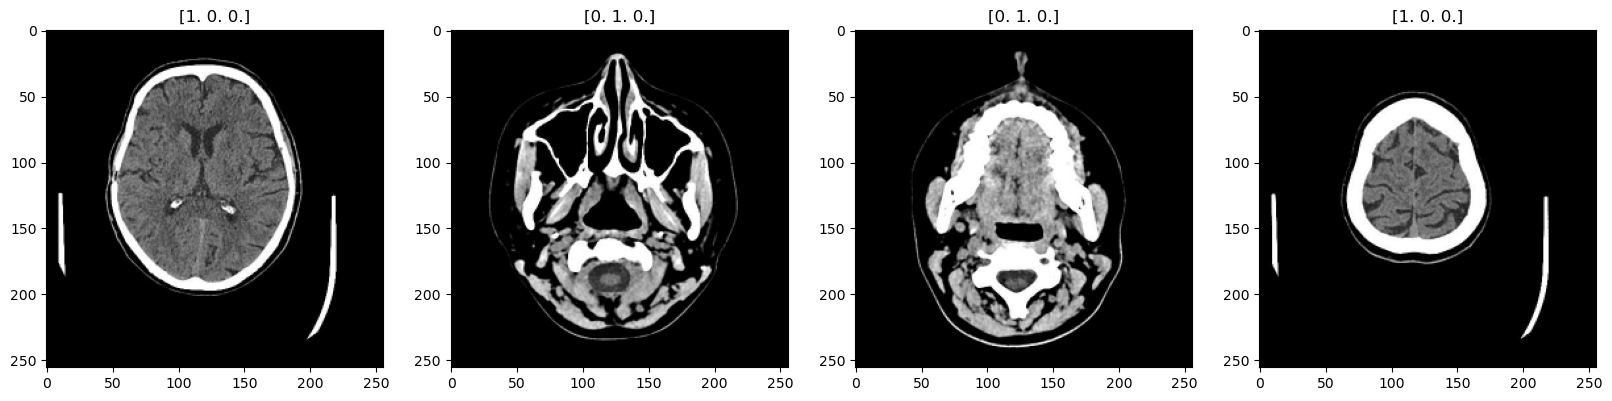

In [211]:
#plot out all images in a particular time
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [121]:
len(batch[0])

32

In [122]:
batch[0].min()

0.0

In [123]:
batch[0].max()

255.0

# 2. Preprocess Data 

## 2.1 Scale Data

In [212]:
#SCALE THE FEATURES 
data = data.map(lambda x, y: (x/255, y))

In [213]:
scaled_iterator = data.as_numpy_iterator()

In [214]:
batch = scaled_iterator.next()

In [127]:
# data.as_numpy_iterator().next()[0].max()

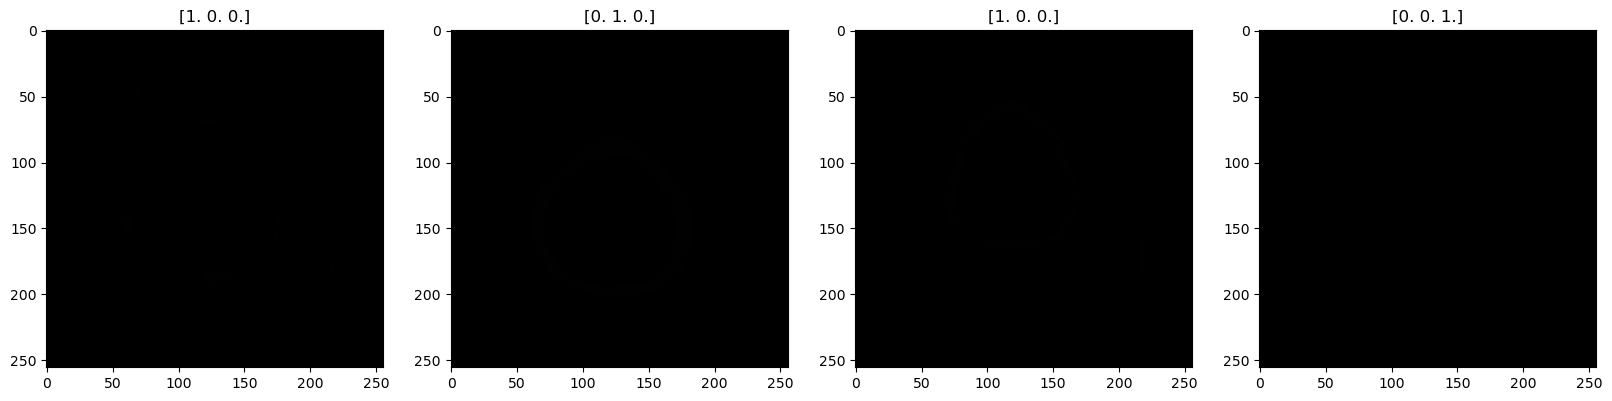

In [215]:
#plot out all images in a particular time
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [129]:
batch[0].min()

0.0

In [130]:
batch[0].max()

1.0

## 2.2 Split Data

In [131]:
len(data)

9

In [216]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [217]:
train_size+val_size+test_size

9

In [134]:
len(data)

9

In [135]:
data.take??

In [218]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

In [193]:
len(test)

1

# 3. Deep Model

## 3.1 Build Deep Learning Model 

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout 

In [220]:
model = Sequential()
# input layer, will have 16 filters, each filter 3x3 pixels, stride of 1 pixel at a time. These can all be CHANGED. 'relu' activation is 0 or positive of course.  
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256,256,3)))
# will take maximum value after relu activation to reduce image data to process, take max value of 2x2.  
model.add(MaxPooling2D())

# 32 filters 3x3 stride of 1
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# will undo the convolution and connect the pieces back together into single output. 
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [221]:
# adam optimizer, many other types, specify loss because it's binary classification. 
model.compile('adam', loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

In [222]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)      

## 3.2 Train 

In [198]:
logdir='logs'

In [223]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [224]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
6/6 [==============================] - 13s 2s/step - loss: 0.6971 - accuracy: 0.6927 - val_loss: 0.3706 - val_accuracy: 0.8906
Epoch 2/5
6/6 [==============================] - 10s 2s/step - loss: 0.1581 - accuracy: 0.9740 - val_loss: 0.0558 - val_accuracy: 0.9688
Epoch 3/5
6/6 [==============================] - 9s 2s/step - loss: 0.0867 - accuracy: 0.9583 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 10s 2s/step - loss: 0.0657 - accuracy: 0.9792 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 10s 2s/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0661 - val_accuracy: 0.9531


In [225]:
hist.history

{'loss': [0.6971489787101746,
  0.15806591510772705,
  0.08674705028533936,
  0.06573490053415298,
  0.048984114080667496],
 'accuracy': [0.6927083134651184,
  0.9739583134651184,
  0.9583333134651184,
  0.9791666865348816,
  0.984375],
 'val_loss': [0.37060806155204773,
  0.05575612932443619,
  0.024301471188664436,
  0.01417713612318039,
  0.06611756980419159],
 'val_accuracy': [0.890625, 0.96875, 1.0, 1.0, 0.953125]}

## 3.3 Plot Performance

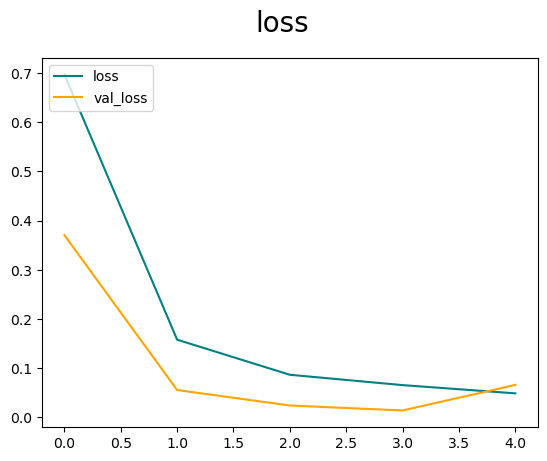

In [226]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [227]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy 

In [228]:
pre = Precision()
re = Recall()
cca = CategoricalAccuracy()

In [229]:
len(test)

1

In [230]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    cca.update_state(y, yhat)

1/1 [==============================] - 1s 777ms/step


In [241]:
print(f'Precision: {pre.result().numpy()}\n'
      f'Recall: {re.result().numpy()}\n'
      f'Accuracy: {cca.result().numpy()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


## 4.2 Test